In [52]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np


In [53]:
play_styles_filepath = 'play_styles.txt'
play_styles_dictionary = {}

In [54]:
with open(play_styles_filepath, 'r') as play_styles_file:
    space = True
    act_role = None
    for line in play_styles_file:
        if space:
            styles_list = []
            act_role = line.strip()
            space = False
        elif line == '\n':
            space = True
            play_styles_dictionary[act_role] = styles_list
        else:
            line = line.strip().split(' - ')
            styles_list.append({line[0]: line[1]})
            

In [55]:
gk_fifa_df = pd.read_csv('goalkeepers_fifa_df.csv')
gk_df = pd.read_csv('goalkeepers_df.csv')
gk_df

,Player,Foot,Height,Weight,Nationality,Club,Wage,Expiration,PSxG-GA,GoalsAgainst,...,GoalKicks,Avg.LengthofGoalKicks,CrossesStopped%,Def.ActionsOutsidePen.Area,Avg.DistanceofDef.Actions,Role,Birth,Value,League,Age
0,David Raya,Right,186.0,81.0,Spain,Arsenal,5.17,2024,-0.02,0.72,...,3.63,45.8,12.3,1.53,17.6,Goalkeeper,1995-09-15,35.0,English Premier League,28
1,Aaron Ramsdale,Right,195.0,79.0,England,Arsenal,7.30,2026,-0.23,1.15,...,3.85,48.3,14.2,0.92,12.7,Goalkeeper,1998-05-14,25.0,English Premier League,25
2,Alisson,Right,193.0,91.0,Brazil,Liverpool,9.13,2027,0.05,0.84,...,4.42,35.9,4.8,1.94,18.7,Goalkeeper,1992-10-02,32.0,English Premier League,31
3,Caoimhín Kelleher,Right,188.0,81.0,Ireland,Liverpool,0.61,2026,-0.01,1.42,...,3.16,31.6,8.0,1.26,15.3,Goalkeeper,1998-11-23,18.0,English Premier League,25
4,Ederson,Left,188.0,88.0,Brazil,Manchester City,6.08,2026,0.00,0.89,...,3.60,36.8,8.1,1.13,16.5,Goalkeeper,1993-08-17,40.0,English Premier League,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Stefano Turati,Right,188.0,81.0,Italy,Frosinone,0.85,2024,-0.32,1.93,...,4.70,38.6,4.4,0.63,13.8,Goalkeeper,2001-09-05,7.0,Italian Serie A,22
114,Michele Cerofolini,Right,188.0,79.0,Italy,Frosinone,0.59,2026,-0.15,1.00,...,6.13,40.1,4.6,0.38,12.8,Goalkeeper,1999-01-04,0.5,Italian Serie A,25
115,Andrea Consigli,Right,189.0,78.0,Italy,Sassuolo,1.85,2024,-0.38,1.92,...,6.92,37.6,4.7,0.62,12.5,Goalkeeper,1987-01-27,1.0,Italian Serie A,37
116,Guillermo Ochoa,Right,183.0,78.0,Mexico,Salernitana,1.48,2025,-0.27,2.00,...,8.78,43.7,3.2,0.52,12.8,Goalkeeper,1985-07-13,1.5,Italian Serie A,38


In [56]:
gk_df.columns

Index(['Player', 'Foot', 'Height', 'Weight', 'Nationality', 'Club', 'Wage',
       'Expiration', 'PSxG-GA', 'GoalsAgainst', 'SavePercentage', 'PSxG/SoT',
       'Save%(PenaltyKicks)', 'CleanSheetPercentage', 'Touches', 'Launch%',
       'GoalKicks', 'Avg.LengthofGoalKicks', 'CrossesStopped%',
       'Def.ActionsOutsidePen.Area', 'Avg.DistanceofDef.Actions', 'Role',
       'Birth', 'Value', 'League', 'Age'],
      dtype='object')

C:\Users\fedep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.12487483275724684


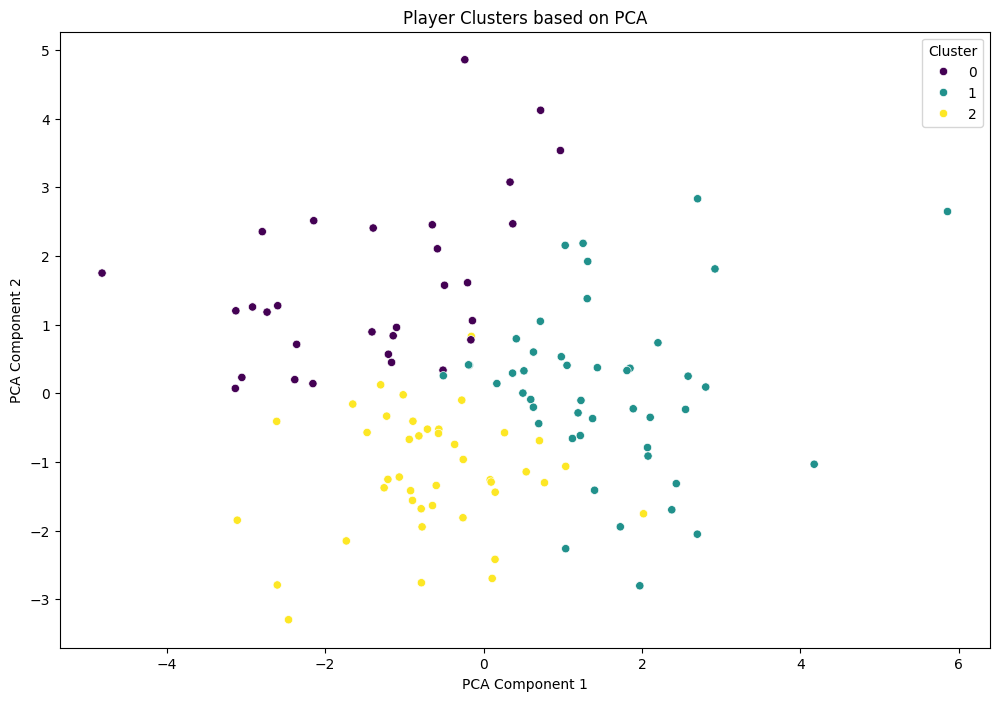

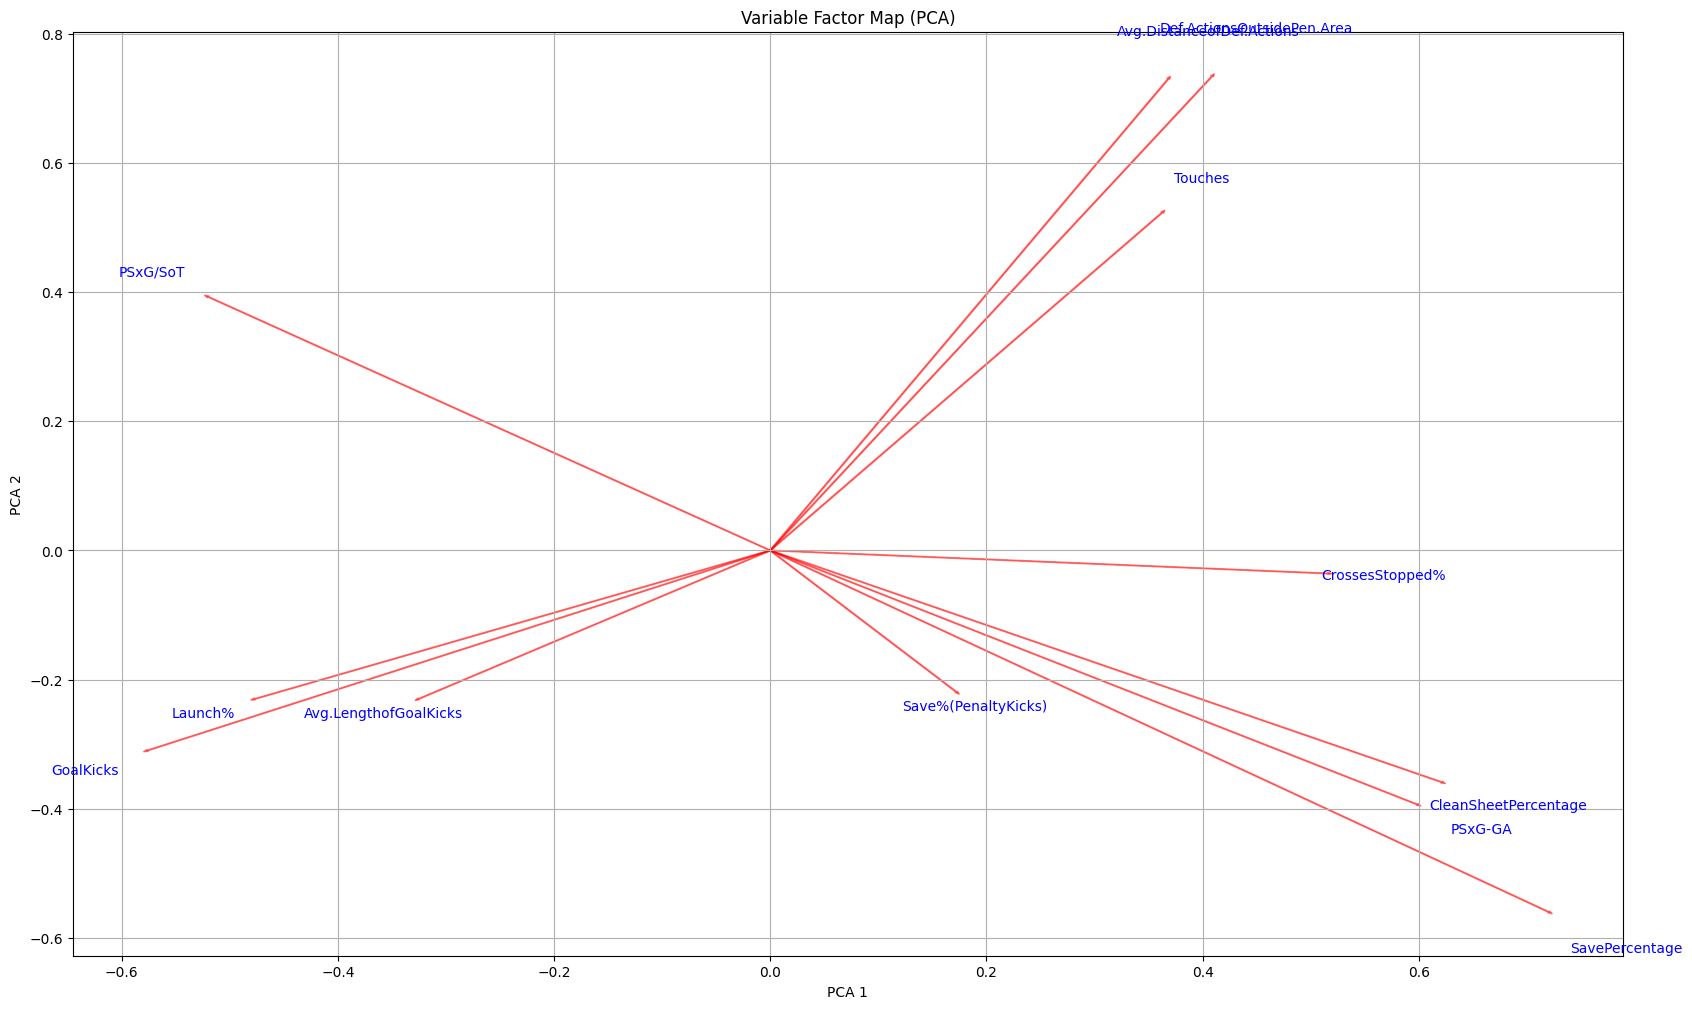

In [57]:
data = gk_df.copy()
features = ['PSxG-GA', 'SavePercentage', 'PSxG/SoT', 'Save%(PenaltyKicks)', 'Touches', 'Launch%',
       'GoalKicks', 'Avg.LengthofGoalKicks', 'CrossesStopped%',
       'Def.ActionsOutsidePen.Area', 'Avg.DistanceofDef.Actions', 'CleanSheetPercentage']

# Filter the data to include only the relevant features
clustering_data = data[features]

# Handle missing values (if any)
clustering_data = clustering_data.dropna()

# Normalize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data_scaled)

# Determine the number of clusters (k = 3 for three playstyles)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]


silhouette_avg = silhouette_score(clustering_data_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features)

# Plot the PCA results with the cluster assignments
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=data)
plt.title('Player Clusters based on PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

data = data.drop(['PCA1', 'PCA2'], axis=1)

variable_factor_map = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(20, 12))
for i, var in enumerate(features):
#     if (variable_factor_map[i,0] > 0.5 or variable_factor_map[i,0] < -0.5) or (variable_factor_map[i,1] > 0.5 or variable_factor_map[i,1] < -0.5):
        plt.arrow(0, 0, variable_factor_map[i, 0], variable_factor_map[i, 1], color='r', alpha=0.5)
        plt.text(variable_factor_map[i, 0] * 1.1, variable_factor_map[i, 1] * 1.1, var, color='b', ha='center', va='center', fontsize=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Variable Factor Map (PCA)')
plt.grid()
plt.show()


0 = Sweeper - Avg position (high y)
1 = BallPlayer - Touches
2 = Line

In [58]:
data['Style'] = data['Cluster'].map({0: 'Sweeper', 1: 'BallPlayer', 2: 'Line'})